### Model Info: loss: 0.2078 - accuracy: 0.9023 - val_loss: 0.1591 - val_accuracy: 0.9245
Data: Grid

ImageDataGenerator( \
    rescale=1. / 255, \
    shear_range=0.2, \
    rotation_range=90, \
    zoom_range=[0.5, 1.5], \
    horizontal_flip=True)
    
batch_size = 16 \
image_width = 256 \
image_height = 256 
    
optimizer = adam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.preprocessing.image import ImageDataGenerator

import datetime, os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
train_path = 'grid_wildfire_smoke/train'
test_path = 'grid_wildfire_smoke/test'

In [3]:
#apply image augmentation
train_image_generator = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    rotation_range=90,
    zoom_range=[0.5, 1.5],
    horizontal_flip=True)
    
test_image_generator = ImageDataGenerator(rescale=1./255)

In [4]:
# Variables for model
batch_size = 16
image_width = 256 
image_height = 256 
classes = ['no_smoke','smoke']
color_mode="rgb"
IMAGE_WIDTH_HEIGHT = (image_width, image_height)

class_mode = 'binary'

#create train data generator flowing from train_input_folder
train_generator = train_image_generator.flow_from_directory(
            train_path,
            target_size=IMAGE_WIDTH_HEIGHT,
            batch_size=batch_size,
            classes=classes,
            color_mode=color_mode,
            class_mode=class_mode)
            
#create validation data generator flowing from test_input_folder
test_generator = test_image_generator.flow_from_directory(
        test_path,
        target_size=IMAGE_WIDTH_HEIGHT,
        batch_size=batch_size,
        classes=classes,
        color_mode=color_mode,
        class_mode=class_mode)

Found 2502 images belonging to 2 classes.
Found 2468 images belonging to 2 classes.


In [5]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

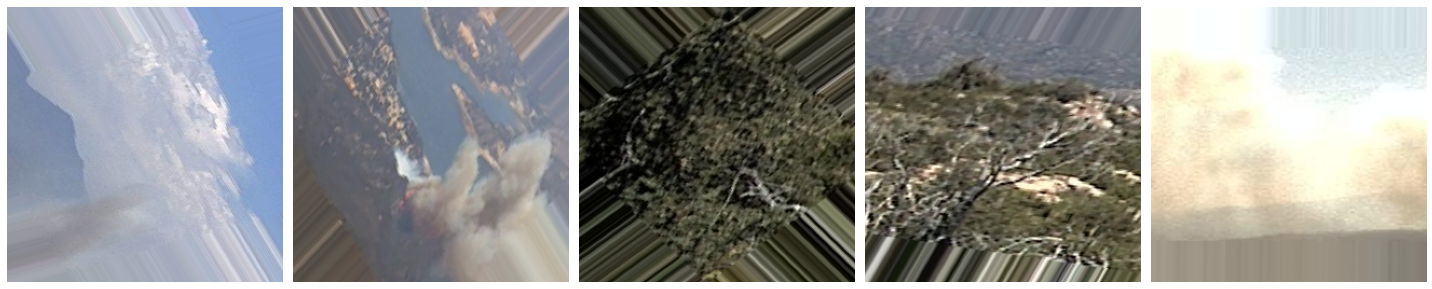

In [6]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:100])

In [7]:
input_shape = (image_width, image_height, 3)

In [8]:
model = Sequential()
model.add(Conv2D(32, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# output layer - binary // sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-04-06 01:41:20.310397: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [28]:
epochs = 10
steps_per_epoch = train_generator.n // train_generator.batch_size
test_steps = test_generator.n // test_generator.batch_size

logdir = os.path.join("tf_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      validation_data=test_generator,
      validation_steps=test_steps,
      epochs=epochs,
      callbacks=[tensorboard_callback])

Epoch 1/2
156/156 [==============================] - 150s 963ms/step - loss: 0.2711 - accuracy: 0.8749 - val_loss: 0.1625 - val_accuracy: 0.9416
Epoch 2/2
156/156 [==============================] - 166s 1s/step - loss: 0.1919 - accuracy: 0.9095 - val_loss: 0.1331 - val_accuracy: 0.9420


Text(0.5, 0, 'epoch')

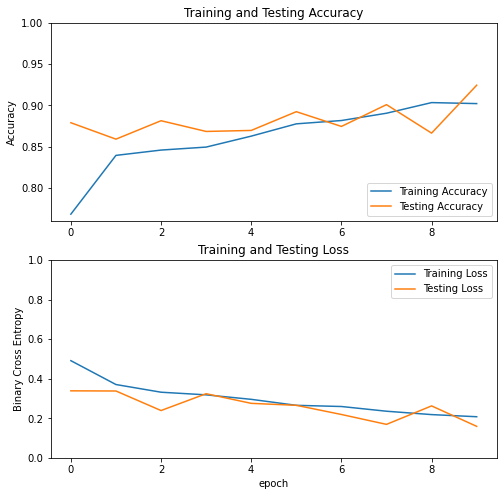

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Testing Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.ylabel('Binary Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Testing Loss')
plt.xlabel('epoch')

In [14]:
# %load_ext tensorboard

In [26]:
# !pip uninstall -y tensorboard tb-nightly
# !pip install tb-nightly

In [29]:
tensorboard --logdir=20220406-021651/ --load_fast true